# <font color = 'blue'>Step 1. Import Libraries</font>

**Before the first time of using this ROM GUI, the essential packages have to be installed. The notebook *InstallPackage.ipynb* can be used for installing all the necessary packages. The source code *pySOFC.py* should be in the same direcory of this ROM GUI notebook.**

**Running the cell below will import the necessary libraries.**

In [41]:
import sys
import time
import getpass
import pySOFC as pys

# <font color = 'blue'>Step 2. Prepare Cases</font>

**The figure below shows an example conceptual design of the "NGFC/IGFC system" SOFC core module. The section in the dashline is the "SOFC stack".  If only the part shown in the dash line box is modeled, please go to *Step 2a* (SOFC stack). If the whole system shown in the figure is modeled, please go to *Step 2b* (NGFC/IGFC system).**
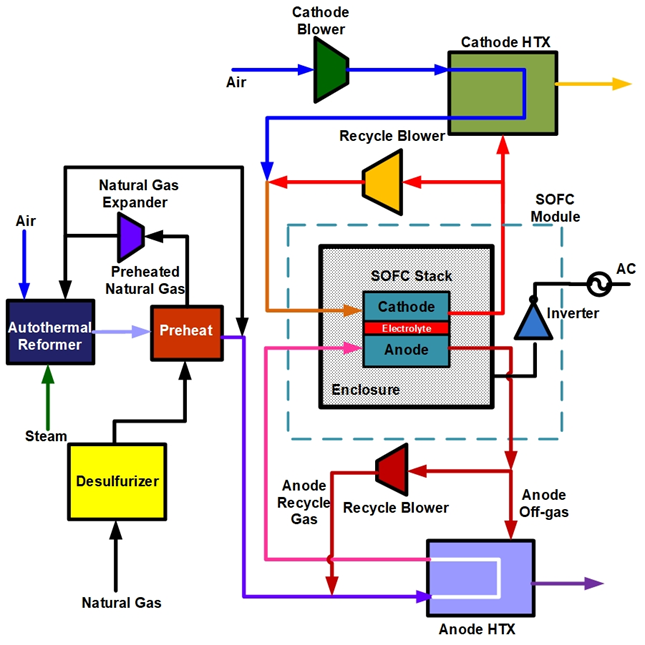

## <font color = 'blue'>Step 2a. SOFC stack only </font>
**In this step, it will generate ROM input samples by Latin Hypercube Sampling (LHS) for assigned input variables, and prepare all the cases according to the samples for the "SOFC stack only" simulations**

* Run the cell below to **Display All the Input Variable Names**
    * <font color = 'blue'>display</font>: = <font color = 'green'>True</font> means displaying the names of input parameters

In [2]:
display = True
options = pys.variable_options(display)

Options of input variable:
1 : Average_CellVoltage, [V]	
2 : Average_CurrentDensity, [A/m^2]	
3 : BackEnvironmentT, [C]	
4 : BottomEnvironmentT, [C]	
5 : CellFuelFlowRate, [mol/s]	
6 : CellOxidantFlowRate, [mol/s]	
7 : FrontEnvironmentT, [C]	
8 : Fuel_Utilization, [-]	
9 : FuelH2, [mol/s]	
10 : FuelH2O, [mol/s]	
11 : FuelCO, [mol/s]	
12 : FuelCO2, [mol/s]	
13 : FuelCH4, [mol/s]	
14 : FuelN2, [mol/s]	
15 : FuelTemperature, [C]	
16 : FuelTOnTop, [C]	
17 : FuelRecyclePercent, [%]	
18 : FuelHTXEffectiveness, [-]	
19 : FuelNGTemperature, [C]	
20 : FuelNGHTXDeltaT, [C]	
21 : Internal_Reforming, [-]	
22 : nCells, [-]	
23 : Oxidant_Recirculation, [-]	
24 : OxidantRecyclePercent, [%]	
25 : OxygenToCarbon_Ratio, [-]	
26 : OxidantO2, [mol/s]	
27 : OxidantN2, [mol/s]	
28 : OxidantH2O, [mol/s]	
29 : OxidantCO2, [mol/s]	
30 : OxidantAr, [mol/s]	
31 : OxidantTemperature, [C]	
32 : OxidantTOnTop, [C]	
33 : PreReform, [-]	
34 : SideEnvironmentT, [C]	
35 : Simulation_Option, [-]	
36 : Stack_Fuel_Utiliza

* Run the cell below to **Perform Latin-Hypercube Sampling (LHS)**
    * <font color = 'blue'>work_path</font>: the working directory which contains the baseline simulation input file, and the user defined I-V relations functions "VoltageOnCurrent.dat"
    * <font color = 'blue'>source_path</font>: the source directory which contains the SOFC-MP solver executables (Linux version) and essential libraries
    * <font color = 'blue'>numvar</font>: number of the input parameters
    * <font color = 'blue'>numsample</font>: number of samples
    * <font color = 'blue'>listvar</font>: the index of the input parameters. The user can choose from the listed input parameters from running the cell above. Note: please only input the index number shown in front of the input parameters' name.
    * <font color = 'blue'>listmin</font>: the lower bond of the input parameter sampling range
    * <font color = 'blue'>listmax</font>: the upper bond of the input parameter sampling range

In [3]:
work_path = './Test_NW'
source_path = './source'
numvar = 3
numsample =200
listvar = [1, 31, 15]
listmin = [0.6, 600, 600]
listmax = [0.9, 800, 900]
pys.LHSampling(work_path, numvar, numsample, listvar, listmin, listmax)

############################################################            
Conducts Latin Hypercube Sampling            
############################################################
"given.dat" file already exists on the local machine, do you want to overwrite it? [y/n] n
"LHS.dat" file already exists on the local machine, do you want to overwrite it? [y/n] n


* Run the cell below to **Create Cases**
    * <font color = 'blue'>inputbasefilename</font>: directory of baseline simulation input file

In [4]:
inputbasefilename = work_path+'/base.dat'
pys.createcases(work_path, source_path, inputbasefilename, preprocessor_enabled=False)

############################################################            
Create case folders on the local machine            
############################################################
End of code



## <font color = 'blue'>Step 2b. NGFC/IGFC system </font>
**This step shares similar functions as "Step 2a", but with different NGFC/IGFC system configurations.**

**"preprocessor" is a pre-processing program that calculate the intermedium input parameters for the SOFC-MP simulation.**

**If the user already ran the "Step 2a" for the "SOFC Stack only" simulation, please skip "Step 2b".**

* Run the cell below to **Display All the Input Variable Options**
    * <font color = 'blue'>display</font>: = <font color = 'green'>True</font> display the variables

In [8]:
display = True
options = pys.variable_options(display)

Options of input variable:
1 : Average_CellVoltage, [V]	
2 : Average_CurrentDensity, [A/m^2]	
3 : BackEnvironmentT, [C]	
4 : BottomEnvironmentT, [C]	
5 : CellFuelFlowRate, [mol/s]	
6 : CellOxidantFlowRate, [mol/s]	
7 : FrontEnvironmentT, [C]	
8 : Fuel_Utilization, [-]	
9 : FuelH2, [mol/s]	
10 : FuelH2O, [mol/s]	
11 : FuelCO, [mol/s]	
12 : FuelCO2, [mol/s]	
13 : FuelCH4, [mol/s]	
14 : FuelN2, [mol/s]	
15 : FuelTemperature, [C]	
16 : FuelTOnTop, [C]	
17 : FuelRecyclePercent, [%]	
18 : FuelHTXEffectiveness, [-]	
19 : FuelNGTemperature, [C]	
20 : FuelNGHTXDeltaT, [C]	
21 : Internal_Reforming, [-]	
22 : nCells, [-]	
23 : Oxidant_Recirculation, [-]	
24 : OxidantRecyclePercent, [%]	
25 : OxygenToCarbon_Ratio, [-]	
26 : OxidantO2, [mol/s]	
27 : OxidantN2, [mol/s]	
28 : OxidantH2O, [mol/s]	
29 : OxidantCO2, [mol/s]	
30 : OxidantAr, [mol/s]	
31 : OxidantTemperature, [C]	
32 : OxidantTOnTop, [C]	
33 : PreReform, [-]	
34 : SideEnvironmentT, [C]	
35 : Simulation_Option, [-]	
36 : Stack_Fuel_Utiliza

* Run the cell below to **Perform Latin-Hypercube Sampling (LHS)**
    * <font color = 'blue'>work_path</font>: the working directory which contains the baseline simulation input file, and the user defined I-V relations functions "VoltageOnCurrent.dat"
    * <font color = 'blue'>source_path</font>: the source directory which contains the SOFC-MP solver executables (Linux version) and essential libraries
    * <font color = 'blue'>numvar</font>: number of the input parameters
    * <font color = 'blue'>numsample</font>: number of samples
    * <font color = 'blue'>listvar</font>: the index of the input parameters. The user can choose from the listed input parameters from running the cell above. Note: please only input the index number shown in front of the input parameters' name.
    * <font color = 'blue'>listmin</font>: the lower bond of the input parameter sampling range
    * <font color = 'blue'>listmax</font>: the upper bond of the input parameter sampling range

In [9]:
work_path = './Test_WW'
source_path = './source'
numvar = 9; numsample = 500
listvar = [2, 19, 21, 31, 23, 25, 36, 37, 52]
listmin = [2000, 15, 0, 550, 0, 1.5, 0.4, 0.0833, 1]
listmax = [6000, 600, 1, 800, 0.8, 3, 0.95, 0.833, 5]
pys.LHSampling(work_path, numvar, numsample, listvar, listmin, listmax)

############################################################            
Conducts Latin Hypercube Sampling            
############################################################
Created given.dat
Given vairables and limits:
1 : Average_CurrentDensity 
	Min:  2000.0 	Max:  6000.0 	 500  Samples	
2 : FuelNGTemperature 
	Min:  15.0 	Max:  600.0 	 500  Samples	
3 : Internal_Reforming 
	Min:  0.0 	Max:  1.0 	 500  Samples	
4 : OxidantTemperature 
	Min:  550.0 	Max:  800.0 	 500  Samples	
5 : Oxidant_Recirculation 
	Min:  0.0 	Max:  0.8 	 500  Samples	
6 : OxygenToCarbon_Ratio 
	Min:  1.5 	Max:  3.0 	 500  Samples	
7 : Stack_Fuel_Utilization 
	Min:  0.4 	Max:  0.95 	 500  Samples	
8 : Stack_Oxidant_Utilization 
	Min:  0.0833 	Max:  0.833 	 500  Samples	
9 : SystemPressure 
	Min:  1.0 	Max:  5.0 	 500  Samples	
Created LHS.dat
End of code



* Run the cell below to **Create Cases**
    * <font color = 'blue'>inputbasefilename</font>: directory of baseline file
    * <font color = 'blue'>preprocessor_name</font>: select one from:
        * <font color = 'green'>'NGFC_ccs'</font> = NGFC with carbon capture
        * <font color = 'green'>'NGFC_nocc'</font> = NGFC without carbon capture 
        * <font color = 'green'>'IGFC_ccs'</font> = IGFC (with aor without carbon capture) 
        * <font color = 'green'>'NGFC_ccs_vgr'</font> = NGFC with vented gas recirculation (VGR)
        * <font color = 'green'>'IGFC_ccs_vgr'</font> = IGFC with vented gas recirculation (VGR)
    * If <font color = 'blue'>preprocessor_name</font> = <font color = 'green'>'IGFC_ccs'</font> or <font color = 'green'>'IGFC_ccs_vgr'</font>: 
        * <font color = 'blue'>igfc</font>: select one gasifier from: <font color = 'green'>'conventional'</font>, <font color = 'green'>'enhanced'</font>, <font color = 'green'>'catalytic'</font> 

In [10]:
inputbasefilename = work_path+'/input000.dat'
preprocessor_enabled = True
preprocessor_name = 'NGFC_ccs'
igfc = None
pys.createcases(work_path, source_path, inputbasefilename, preprocessor_enabled, preprocessor_name, igfc)

############################################################            
Create case folders on the local machine            
############################################################
The following cases failed for preprocessor "NGFC_ccs":
1 3 6 10 11 16 23 30 32 46 47 49 53 57 60 64 66 77 86 88 89 97 105 108 109 111 127 129 137 141 143 147 151 154 159 167 168 169 170 184 185 188 197 206 217 223 225 227 231 233 236 244 245 246 252 254 259 261 264 271 274 282 291 294 296 300 301 302 303 322 324 329 336 340 341 346 358 359 368 369 372 378 380 383 386 400 403 404 406 409 416 420 428 432 435 438 448 450 451 456 467 470 471 472 476 482 486 498
End of code



# <font color = 'blue'>Step 3. Run Simulations</font>

**Once the cases are generated, the user can choose to run simulations on the Windows subsystem for Linux (WSL) (Go to *Step 3a*) or on the remote High-Performance Computing (HPC) cluster (Go to *Step 3b*).**  

**If the Windows subsystem for Linux (WSL) is not installed, please follow the instructions in *WSL_Instruction.pdf* to install the subsystem and openSSH**

## <font color = 'blue'>Step 3a. Run on the Windows subsystem for Linux (WSL)</font>
**In this step, it will submit simulations to the subsystem. The simulations are running in the background and the user can check the status anytime**

* Before running the cell below, please launch Windows subsystem for Linux (WSL), and run the commond <font color = 'green'>"sudo service ssh --full-restart"</font> in WSL terminal.
* Run the cell below to **Create a Simulation Job**
    * Assign the absolute working and the source directories to <font color = 'blue'>work_path_SS</font> and <font color = 'blue'>source_path_SS</font> 
        * by default, they should be the same as <font color = 'blue'>work_path</font> and <font color = 'blue'>source_path</font> in **Step 2**, but start with <font color = 'green'>/mnt/</font>
    * Provide the WSL access information:
        * <font color = 'blue'>hostname</font>: the address of the WSL
        * <font color = 'blue'>username</font>, <font color = 'blue'>password</font>, <font color = 'blue'>port</font>
    * <font color = 'blue'>numcase</font>: the number of cases sent for the simulation
        * it cannot exceed the number of samples (<font color = 'blue'>numsample</font> defined in **Step 2**)
    * <font color = 'blue'>vgr_enabled</font>: = <font color = 'green'>True</font> means enabling vented gas recirculation (VGR) for the NGFC/IGFC system. It does not work for the "SOFC stack only" simulation.

In [5]:
# Both "no-preprocessor" and "preprocessor" cases can be simulated on the WSL
# Here we provide an example working on "no-preprocessor" cases
work_path_SS = '/mnt/c/Users/wang109/Documents/GitHub/Python_ROM_GUI/Test_NW'
source_path_SS = '/mnt/c/Users/wang109/Documents/GitHub/Python_ROM_GUI/source'
hostname = '127.0.0.1'
username = 'wang109'
port = 2222; 
password = getpass.getpass(prompt = 'Enter the password:')
numcase = numsample
vgr_enabled = False
SS = pys.runSimu_SubSys(work_path_SS, source_path_SS, numcase, vgr_enabled, hostname, username, password, port)

Enter the password:········


* Run the cell below to **Submit the Simulation Job**
    * <font color = 'blue'>MaxSimulIns</font>: the number of threads/cores that can run simultaneous simulations allowed
    * <font color = 'blue'>time_limit</font>: the estimated running time for the job

In [6]:
MaxSimulIns = 10
time_limit = '1:00:00'
SS.SubSimuonSS(MaxSimulIns, time_limit)

############################################################              
Submit simulations on the sub-system              
############################################################
Simulation status:
Running: 10	Finished: 5
Simulation status:
Running: 10	Finished: 11
Simulation status:
Running: 10	Finished: 16
Simulation status:
Running: 10	Finished: 21
Simulation status:
Running: 10	Finished: 26
Simulation status:
Running: 10	Finished: 31
Simulation status:
Running: 10	Finished: 36
Simulation status:
Running: 10	Finished: 41
Simulation status:
Running: 10	Finished: 46
Simulation status:
Running: 10	Finished: 52
Simulation status:
Running: 10	Finished: 57
Simulation status:
Running: 10	Finished: 62
Simulation status:
Running: 10	Finished: 67
Simulation status:
Running: 10	Finished: 73
Simulation status:
Running: 10	Finished: 78
Simulation status:
Running: 10	Finished: 84
Simulation status:
Running: 10	Finished: 89
Simulation status:
Running: 10	Finished: 94
Simulation status:
Run

* Run the cell below to **Check the Progress of the Simulation Job**

In [7]:
SS.CheckSimuStatus()

############################################################              
Checks the simulation status              
############################################################
200 out of 200 cases have been done:
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199


## <font color = 'blue'>Step 3b. Run on the remote HPC cluster</font>
**This step shares similar functions as "Step 3a", but submitting the simulations to the remote HPC cluster.**

**If all the simulations have been completed on the local PC (in WSL), please skip "Step 3b", unless the user wants to rerun the simulations on remote HPC.**

* Run the cell below to **Create a Simulation Job**
    * Assign the working directories on the local machine and on the HPC
        * <font color = 'blue'>local_path</font>: the local working directory; By default, it is the same as <font color = 'blue'>work_path</font> in **Step 2**
        * <font color = 'blue'>HPC_path</font>: the working directory on the HPC
        * <font color = 'blue'>create_HPC_path</font>: = <font color = 'green'>True</font> means creating the directory if it doesn't exist
    * Provide the HPC access information:
        * <font color = 'blue'>hostname</font>: the address of the HPC
        * <font color = 'blue'>username</font>, <font color = 'blue'>password</font>, <font color = 'blue'>port</font>
    * <font color = 'blue'>numcase</font>: the number of cases sent for the simulation
        * it cannot exceed the number of samples (<font color = 'blue'>numsample</font> defined in **Step 2**)
    * <font color = 'blue'>vgr_enabled</font>: = <font color = 'green'>True</font> means enabling vented gas recirculation (VGR) in the NGFC and IGFC system. 
    * <font color = 'blue'>use_scratch</font>: = <font color = 'green'>True</font> means storing the files temporarily on the hard drive on the computing node. If the compute node allows user storing file on <font color = 'green'>/scratch</font> folder, enabling this can increase the file exchange speed during simulation

In [11]:
# Both "no-preprocessor" and "preprocessor" cases can be simulated on the HPC
# Here we provide an example working on "preprocessor" cases
local_path = work_path
HPC_path = '/qfs/people/wang109/test/Test_11192020'
create_HPC_path = True
hostname = 'constance.pnl.gov'
username = 'wang109'
port = 22; 
password = getpass.getpass(prompt = 'Enter the password:')
numcase = numsample
vgr_enabled = False
use_scratch = False
SH = pys.runSimu_HPC(local_path, HPC_path, numcase, create_HPC_path, 
                     use_scratch, vgr_enabled, hostname, username, password, port)

Enter the password:········


* Run the cell below to **Upload the Cases to the HPC**

In [12]:
SH.PutCaseonHPC()

############################################################              
Put all the cases on the HPC              
############################################################
The remote path does not exist, create directories


* Run the cell to **Submit the Simulation Job**
    * <font color = 'blue'>NumCores_eachnode</font>: the number of simulations allocated on each node
    * <font color = 'blue'>allocation</font>: the allocation account name
    * <font color = 'blue'>partition</font>: the partition name
    * <font color = 'blue'>time_limit</font>: the estimated running time for the job

In [13]:
SH.SubSimuonHPC(NumCores_eachnode = 24, allocation = 'sofc', partition = 'slurm', time_limit = '0:60:00')

############################################################              
Submit simulations on the HPC              
############################################################
The following cases already have "SOFC_MP_ROM.dat" on the local machine:
1 3 6 10 11 16 23 30 32 46 47 49 53 57 60 64 66 77 86 88 89 97 105 108 109 111 127 129 137 141 143 147 151 154 159 167 168 169 170 184 185 188 197 206 217 223 225 227 231 233 236 244 245 246 252 254 259 261 264 271 274 282 291 294 296 300 301 302 303 322 324 329 336 340 341 346 358 359 368 369 372 378 380 383 386 400 403 404 406 409 416 420 428 432 435 438 448 450 451 456 467 470 471 472 476 482 486 498
".sbatch" files have been put on the HPC, do you want to submit the simulations? [y/n] y
Submitted batch job 15551952
Submitted batch job 15551953
Submitted batch job 15551954
Submitted batch job 15551955
Submitted batch job 15551956
Submitted batch job 15551957
Submitted batch job 15551958
Submitted batch job 15551959
Submitted batch job

* Run the cell below to **Check the Progress of the Simulation Job**

In [14]:
SH.CheckSimuStatus()

############################################################              
Checks the simulation status on the HPC              
############################################################
156 out of 392 cases have been done:
0 5 8 9 17 18 20 21 22 24 25 28 33 34 35 36 37 40 41 42 45 48 52 55 56 61 65 68 69 72 73 74 78 81 84 85 90 92 94 95 96 98 101 102 103 106 110 112 113 114 115 118 119 121 123 125 126 130 132 134 135 150 153 155 156 163 173 176 177 178 179 181 182 191 192 199 203 205 207 211 213 215 219 221 228 232 241 248 253 255 256 260 262 263 268 277 280 284 286 287 288 290 313 315 316 317 318 321 325 330 332 338 339 342 344 347 348 350 353 357 363 371 375 376 382 384 388 396 414 415 417 422 424 425 426 427 433 434 436 437 439 440 441 442 446 449 453 455 464 468 469 484 487 489 492 499


* Run the cell below to **Download the Simulation Results from the HPC**

In [15]:
SH.GetReslfromHPC()

############################################################              
Get simulation results from the HPC              
############################################################
The following cases do not have "SOFC_MP_ROM.dat" on the HPC (case failed or has not converged yet):
2 4 7 12 13 15 19 26 27 29 31 38 39 43 44 50 51 54 58 59 62 63 67 70 71 75 76 79 80 82 83 87 91 93 99 100 104 107 116 117 120 122 124 128 131 133 136 138 139 140 142 144 145 146 148 149 152 157 158 160 161 162 164 165 166 171 172 174 175 180 183 186 187 189 190 193 194 195 196 198 200 201 202 204 208 209 210 212 214 216 218 220 222 224 226 229 230 234 235 237 238 239 240 242 243 247 249 250 251 257 258 265 266 267 269 270 272 273 275 276 278 279 281 283 285 289 292 293 295 297 298 299 304 305 306 307 308 309 310 311 312 314 319 320 323 326 327 328 331 333 334 335 337 343 345 349 351 352 354 355 356 360 361 362 364 365 366 367 370 373 374 377 379 381 385 387 389 390 391 392 393 394 395 397 398 399 401 402

# <font color = 'blue'>Step 4. Build ROMs and Predict</font>

**With the simulation results, the user can choose to build the ROM based on the Kriging algorithm (Go to *Step 4a*) or the DNN method (Go to *Step 4b*), and make predicitons based on the trained model.**

## <font color = 'blue'>Step 4a. with Kriging method</font>
**In this step, thie ROM GUI notebook summarizes the simulation results, builds the Reduced Order Models (ROM), performs cross validation to estimate the confidence interval, makes predictions based on the trained model, and visulizes the training/prediction datasets**

* Run the cell below to **Create a ROM Job**
    * Assign the working directory for kriging
        * <font color = 'blue'>work_path</font>: by default, it is the same as <font color = 'blue'>work_path</font> in **Step 2**
    * <font color = 'blue'>allresults</font>: File name of summarized simulation results
    * <font color = 'blue'>allresults_info</font>: File name of supplemental file for the simulation results
    * <font color = 'blue'>intraining</font>: File name of training input file
    * <font color = 'blue'>info</font>: File name of supplemental file for the training input
    * <font color = 'blue'>outtraining</font>: File name of training output file
    * <font color = 'blue'>inprediction</font>: File name of prediction input file
    * <font color = 'blue'>outprediction</font>: File name of prediction output file
    * <font color = 'blue'>poly_order</font>: The order of polynomial regression model for kriging. Select <font color = 'green'>0</font> or <font color = 'green'>1</font>

In [16]:
work_path = './Test_WW'
allresults = 'allResults_kriging.dat'
allresults_info = 'allResults_kriging_info.dat'
intraining = 'intraining_Kriging.dat'
info = 'info_kriging.dat'
outtraining = 'outtraining_kriging.dat'
inprediction = 'inPrediction_kriging.dat'
outprediction = 'outPrediction_kriging.dat'
poly_order = 0
k = pys.kriging(work_path, allresults, allresults_info, 
            intraining, info, outtraining, 
            inprediction, outprediction, order = poly_order)

* Run the cell below to **Summarize the Simulation Results**
    * Assign the source directory where the simulation results are
        * <font color = 'blue'>source_path</font>: by default, it is the same as <font color = 'blue'>work_path</font> in **Step 2**
    * <font color = 'blue'>indcase</font>: the cases which will be summarized for training input file
        * By default, all the cases (<font color = 'green'>[1, 2, 3, ... , <font color = 'blue'>numcase</font>]</font>) are included
        * User can select any certain cases (e.g.: <font color = 'green'>[1, 2, 3, 4, 5]</font> for the first five cases)
    * <font color = 'blue'>exclude_case</font>: select from <font color = 'green'>-1</font>, <font color = 'green'>0</font> and <font color = 'green'>1</font>
        * <font color = 'green'>-1</font>: include all the cases with results
        * <font color = 'green'>0</font>: exclude failed cases
        * <font color = 'green'>1</font>: exclude failed and non-converged cases
    * <font color = 'blue'>display_detail</font>: = <font color = 'green'>True</font> means displaying the contents of the training input file
    * It will generate <font color = 'green'>allResults.dat</font> and <font color = 'green'>allResults_info.dat</font>

In [17]:
source_path = work_path
indcase = list(range(1, numcase+1)) # [1, 2, 3, ... , numcase]
exclude_case = 1
display_detail = False
k.summarize_SimuResult(source_path, indcase, exclude_case, display_detail)

############################################################              
Summarize simulation results              
############################################################
Converged simulation results are summarized from 119 cases:
10 15 18 19 21 23 25 26 34 35 36 37 41 42 43 49 56 57 62 66 73 74 75 79 82 93 96 97 103 107 113 114 115 119 120 124 126 127 131 133 135 151 154 156 157 164 174 177 178 180 182 200 204 206 208 214 216 220 229 233 242 249 254 256 257 261 263 264 278 281 285 287 289 314 317 318 319 322 326 331 333 339 343 345 348 349 351 354 364 372 376 377 385 389 397 415 416 418 423 425 426 427 428 435 437 438 442 443 447 450 454 456 469 470 485 488 490 493 500

Select from the following input variables for training:
1 : Average_CurrentDensity	
2 : FuelNGTemperature	
3 : Internal_Reforming	
4 : OxidantTemperature	
5 : Oxidant_Recirculation	
6 : OxygenToCarbon_Ratio	
7 : Stack_Fuel_Utilization	
8 : Stack_Oxidant_Utilization	
9 : SystemPressure	

Select from the followin

* Run the cell below to **Build the ROM**
    * <font color = 'blue'>indS</font>: the input variables which will be used for training
        * By default = <font color = 'green'>None</font>, all the input variables are included
        * User can select any certain variables (e.g.: <font color = 'green'>[1, 2, 3, 4, 5]</font> for the first five input variables)
    * <font color = 'blue'>indY</font>: the output variables which will be used for training
        * By default  = <font color = 'green'>None</font>, all the output variables are included
        * User can select any certain variables (e.g.: <font color = 'green'>[1, 2, 3, 4, 5]</font> for the first five output variables)
    * <font color = 'blue'>frac4ROM</font>: the fraction of the summarized simulation results to build the ROM, the rest is used for cross-validation
        * By default  = <font color = 'green'>80</font> means 80% of the data are used to build the ROM, 20% are used for cross-validation
    * <font color = 'blue'>filter_enabled</font>: The user can choose to enable a z-score filter to remove out-of-bound noise and smooth the raw training data
        * A z-score (also called a standard score) is a measure of how many standard deviations below or above the population mean a raw data point is, the data points with z-scores larger than <font color = 'blue'>z_thres</font> will be filtered
    * It will generate the trained model (<font color = 'green'>outTraining.dat.dat</font>) and perform the cross-validation for all the output variables

In [18]:
indS = None
indY = [2, 4, 9, 11, 12, 14]
frac4ROM = 80
filter_enabled = True # enable or not the z-score filter
z_thres = 5 # threshold of the z-score filter
k.buildROM(indS, indY, frac4ROM, filter_enabled, z_thres)

############################################################              
Build the ROM              
############################################################
Noise filter: trim 0 rows from a total of 119 rows
############################################################              
Train the Kriging model (order  0 )              
############################################################
Step 1: Load the training data S, Y
Step 2: Normalize S, Y
Step 3: Regression model
	Design variable: 
	lower bound:  [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1] , upper bound:  [20. 20. 20. 20. 20. 20. 20. 20. 20.] , initial theta:  [10. 10. 10. 10. 10. 10. 10. 10. 10.]
	Initial: obj:  5.936842104429751
	 1  iteration - Finish EXPLORE - obj:  5.936842028671609
	             - Finish MOVE - obj:  4.505647931123194
	 2  iteration - Finish EXPLORE - obj:  4.45554005533884
	             - Finish MOVE - obj:  4.282566586933095
	 3  iteration - Finish EXPLORE - obj:  4.171499111666609
	             - Fi

* Run the cell below to **Estimate the Confidence Intervals of all the Output Variables**
    * <font color = 'blue'>percentage</font>: the confidence percentage
    * <font color = 'blue'>int_all</font>: the confidence interval (display as follows)

In [19]:
percentage = 95
int_all = k.percent2intervl(percentage)

############################################################              
Percentage to Confidence Interval              
############################################################
For "Stack_Voltage":[V] 
	95% confidence interval is ± 5.1469E-02	
For "Stack_Current":[A] 
	95% confidence interval is ± 6.2903E+01	
For "Max_Cell_Temperature":[K] 
	95% confidence interval is ± 8.6260E+01	
For "Delta_Cell_Temperature":[K] 
	95% confidence interval is ± 5.4375E+01	
For "Outlet_Fuel_Temperature":[K] 
	95% confidence interval is ± 6.9044E+01	
For "Outlet_Air_Temperature":[K] 
	95% confidence interval is ± 9.0268E+01	
End of code



* Run the cell below to **Estimate the Confidence Intervals of a Certain Output Variable**
    * <font color = 'blue'>percentage</font>: the confidence percentage
    * <font color = 'blue'>variable_name</font>: the output variable name can be found from above cells
    * <font color = 'blue'>interval</font>: the confidence interval (display as follows)

In [20]:
percentage = 95
variable_name = 'Stack_Current'
interval = k.percent2intervl(percentage, variable_name)

############################################################              
Percentage to Confidence Interval              
############################################################
For "Stack_Current":[A] 
	95% confidence interval is ± 6.2903E+01	
End of code



* Run the cell below to **Estimate the Confidence Percentage of a Certain Output Variable**
    * <font color = 'blue'>interval</font>: the confidence interval
    * <font color = 'blue'>variable_name</font>: the output variable name can be found from above cells
    * <font color = 'blue'>percentage</font>: the confidence percentage (display as follows)

In [21]:
interval = 0.02
variable_name = 'Stack_Current'
percentage = k.intervl2percent(interval, variable_name)

############################################################              
Confidence Interval to Percentage              
############################################################
For "Stack_Current": [A]
	±0.02 interval has a confidence of 43.46%
End of code



* Run the cell below to **Generate the Prediction Input File** (<font color = 'green'>inPrediction.dat</font>)
    * the length of <font color = 'blue'>listmin</font> and <font color = 'blue'>listmax</font> must be the same as the input variables in kriging input file (<font color = 'green'>inKriging.dat</font>)
    * usually, the user mannually prepares a prediction input file

In [22]:
numsample =200
listmin = [2000, 15, 0, 550, 0, 1.5, 0.4, 0.0833, 1]
listmax = [6000, 600, 1, 800, 0.8, 3, 0.95, 0.833, 5]
k.Generate_inprediction(numsample, listmin, listmax)

############################################################                
Generate prediction input                
############################################################
Created prediciton input file
End of code



* Run the cell below to **Perform Prediction based on the Trained Model** 
    * It will generate the prediction output file (<font color = 'green'>outPrediction.dat</font>)

In [23]:
k.prediction()

############################################################              
Predict Based on the trained kriging model (order  0 )              
############################################################
Step 1: Load the training data S, Y and prediction input data X
Step 2: Load the trained model (outkrigingFile)
Step 3: Regression model
	Finish Prediction - Xy
	Finish MSEs - or1
Step 4: Write the predictions
End of code



* Run the cell below to **Plot 2-D Contour**
    * <font color = 'blue'>x_variable_name</font>: the independent variable name on the X-axis
    * <font color = 'blue'>y_variable_name</font>: the independent variable name on the Y-axis
    * <font color = 'blue'>z_variable_name</font>: the dependent variable name on the Z-axis
    * <font color = 'blue'>pltoption</font>: select from <font color = 'green'>0</font>, <font color = 'green'>1</font> and <font color = 'green'>2</font>
        * <font color = 'green'>0</font>: plot both training input and prediction output
        * <font color = 'green'>1</font>: only plot training data
        * <font color = 'green'>2</font>: only plot prediction data
    * <font color = 'blue'>saveoption</font>: = <font color = 'green'>True</font> means saving the figure to the working directory

############################################################              
Predict Based on the trained kriging model (order  0 )              
############################################################
Step 1: Load the training data S, Y and prediction input data X
Step 2: Load the trained model (outkrigingFile)
Step 3: Regression model
	Finish Prediction - Xy
	Finish MSEs - or1
Step 4: Write the predictions
End of code



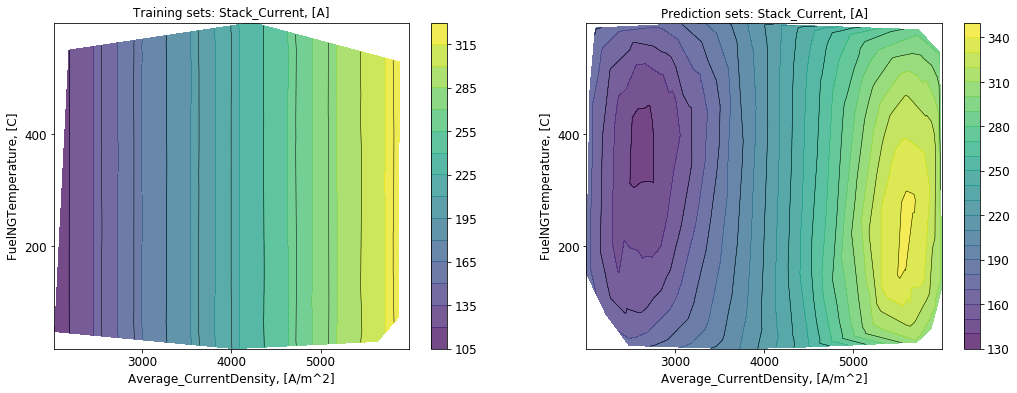

In [24]:
x_variable_name = 'Average_CurrentDensity'
y_variable_name = 'FuelNGTemperature'
z_variable_name = 'Stack_Current'
pltoption = 0
saveoption = False
k.plot_contour_2D(x_variable_name, y_variable_name, z_variable_name, pltoption, saveoption)

* Run the cell below to **Plot 3-D Contour**
    * <font color = 'blue'>x_variable_name</font>: the independent variable name on the X-axis
    * <font color = 'blue'>y_variable_name</font>: the independent variable name on the Y-axis
    * <font color = 'blue'>z_variable_name</font>: the dependent variable name on the Z-axis
    * <font color = 'blue'>pltoption</font>: select from <font color = 'green'>0</font>, <font color = 'green'>1</font> and <font color = 'green'>2</font>
        * <font color = 'green'>0</font>: plot both training input and prediction output
        * <font color = 'green'>1</font>: only plot training data
        * <font color = 'green'>2</font>: only plot prediction data
    * <font color = 'blue'>saveoption</font>: = <font color = 'green'>True</font> means saving the figure to the working directory

############################################################              
Predict Based on the trained kriging model (order  0 )              
############################################################
Step 1: Load the training data S, Y and prediction input data X
Step 2: Load the trained model (outkrigingFile)
Step 3: Regression model
	Finish Prediction - Xy
	Finish MSEs - or1
Step 4: Write the predictions
End of code



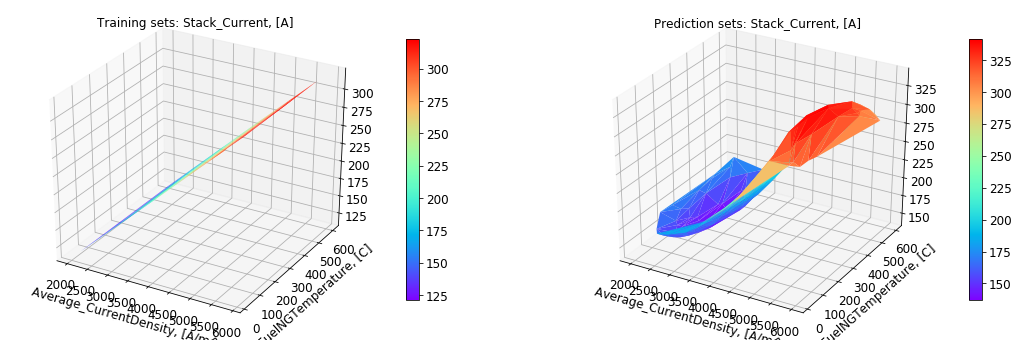

In [25]:
x_variable_name = 'Average_CurrentDensity'
y_variable_name = 'FuelNGTemperature'
z_variable_name = 'Stack_Current'
pltoption = 0
saveoption = False
k.plot_contour_3D(x_variable_name, y_variable_name, z_variable_name, pltoption, saveoption)

* Run the cell below to **Plot box plot**
    * it is to study the sensitivity between input and output variables
    * <font color = 'blue'>x_variable_name</font>: the independent variable name on the X-axis
    * <font color = 'blue'>y_variable_name</font>: the dependent variable name on the Y-axis
    * <font color = 'blue'>saveoption</font>: = <font color = 'green'>True</font> means saving the figure to the working directory

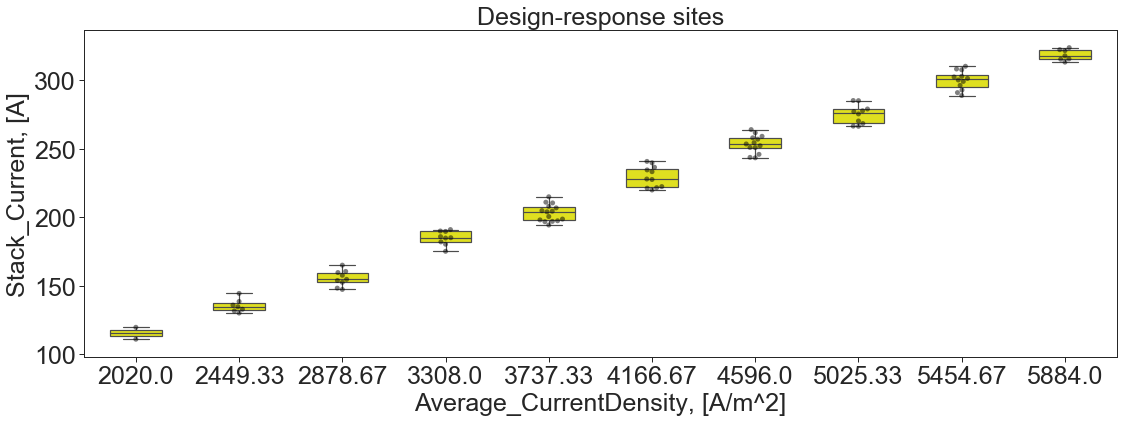

In [26]:
x_variable_name = 'Average_CurrentDensity'
y_variable_name = 'Stack_Current'
saveoption = False
k.plot_box(x_variable_name, y_variable_name, saveoption)

## <font color = 'blue'>Step 4b. with DNN method</font>
**This step shares similar functions as "Step 4a", but trains the ROMs with the DNN regression model**

* Run the cell below to **Create a ROM Job**
    * Assign the working directory for kriging
        * <font color = 'blue'>work_path</font>: by default, it is the same as <font color = 'blue'>work_path</font> in **Step 2**
    * <font color = 'blue'>allresults</font>: File name of summarized simulation results
    * <font color = 'blue'>allresults_info</font>: File name of supplemental file for the simulation results
    * <font color = 'blue'>intraining</font>: File name of training input file
    * <font color = 'blue'>info</font>: File name of supplemental file for the training input
    * <font color = 'blue'>outtraining</font>: File  name of training output file
    * <font color = 'blue'>inprediction</font>: File  name of prediction input file
    * <font color = 'blue'>outprediction</font>: File  name of prediction output file

In [42]:
work_path = './Test_WW'
allresults = 'allResults_DNN.dat'
allresults_info = 'allResults_DNN_info.dat'
intraining = 'inTraining_DNN.dat'
info = 'info_DNN.dat'
outtraining = 'outTraining_DNN.dat' 
inprediction = 'inPrediction_DNN.dat'
outprediction = 'outPrediction_DNN.dat'
d = pys.DNN(work_path, allresults, allresults_info, 
            intraining, info, outtraining, 
            inprediction, outprediction)

* Run the cell below to **Summarize the Simulation Results**
    * Assign the source directory where the simulation results are
        * <font color = 'blue'>source_path</font>: by default, it is the same as <font color = 'blue'>work_path</font> in **Step 2**
    * <font color = 'blue'>indcase</font>: the cases which will be summarized for training input file
        * by default, all the cases (<font color = 'green'>[1, 2, 3, ... , <font color = 'blue'>numcase</font>]</font>) are included
        * honestly, the user can select any certain cases (e.g.: <font color = 'green'>[1, 2, 3, 4, 5]</font> for the first five cases)
    * <font color = 'blue'>exclude_case</font>: select from <font color = 'green'>-1</font>, <font color = 'green'>0</font> and <font color = 'green'>1</font>
        * <font color = 'green'>-1</font>: include all the cases with results
        * <font color = 'green'>0</font>: exclude failed cases
        * <font color = 'green'>1</font>: exclude failed and non-converged cases
    * <font color = 'blue'>display_detail</font>: = <font color = 'green'>True</font> means displaying the contents of the training input file
    * It will generate <font color = 'green'>allResults.dat</font> and <font color = 'green'>allResults_info.dat</font>

In [28]:
source_path = work_path
indcase = list(range(1, numcase+1)) # [1, 2, 3, ... , numcase]
exclude_case = -1
display_detail = False
d.summarize_SimuResult(source_path, indcase, exclude_case, display_detail)

############################################################              
Summarize simulation results              
############################################################
Simulation results are summarized from 151 cases:
1 6 9 10 15 18 19 21 22 23 25 26 29 34 35 36 37 38 41 42 43 46 49 56 57 62 66 69 70 73 74 75 79 82 85 86 91 93 95 96 97 103 104 107 111 113 114 115 116 119 120 122 124 126 127 131 133 135 136 151 154 156 157 164 174 177 178 179 180 182 183 192 193 200 204 206 208 212 214 216 220 222 229 233 242 249 254 256 257 261 263 264 269 278 281 285 287 289 314 317 318 319 322 326 331 333 339 340 343 345 348 349 351 354 358 364 372 376 377 383 385 389 397 415 416 418 423 425 426 427 428 434 435 437 438 440 441 442 443 447 450 454 456 465 469 470 485 488 490 493 500

Select from the following input variables for training:
1 : Average_CurrentDensity	
2 : FuelNGTemperature	
3 : Internal_Reforming	
4 : OxidantTemperature	
5 : Oxidant_Recirculation	
6 : OxygenToCarbon_Ratio	
7 

* Run the cell below to **Build the ROM using DNN regression**
    * <font color = 'blue'>indS</font>: the input variables which will be used for training
        * By default = <font color = 'green'>None</font>, all the input variables are included
        * User can select any certain variables (e.g.: <font color = 'green'>[1, 2, 3, 4, 5]</font> for the first five input variables)
    * <font color = 'blue'>indY</font>: the output variables which will be used for training
        * By default  = <font color = 'green'>None</font>, all the output variables are included
        * User can select any certain variables (e.g.: <font color = 'green'>[1, 2, 3, 4, 5]</font> for the first five output variables)
    * <font color = 'blue'>frac4ROM</font>: the fraction of the summarized simulation results to build the ROM, the rest is used for cross-validation
        * By default  = <font color = 'green'>80</font> means 80% of the data are used to build the ROM, 20% are used for cross-validation
    * <font color = 'blue'>filter_enabled</font>: The user can choose to enable a z-score filter to remove out-of-bound noise and smooth the raw training data
        * A z-score (also called a standard score) is a measure of how many standard deviations below or above the population mean a raw data point is, the data points with z-scores larger than <font color = 'blue'>z_thres</font> will be filtered
    * It will generate the trained model (<font color = 'green'>outTraining.dat.dat</font>) and perform the cross-validation for all the output variables

In [44]:
indS = None
indY = [2, 4, 9, 11, 12, 14]
frac4ROM = 80
filter_enabled = True # enable the z-score filter or not
z_thres = 5 # threshold of the z-score filter
d.buildROM(indS, indY, frac4ROM, filter_enabled, z_thres)

############################################################              
Build the ROM              
############################################################
DNN classification training start ...
training data set size   120  *  9
validation data set size 31  *  9
Epoch: 1 cost = 0.85765   Validation accuracy: 0.6451613  
Epoch: 101 cost = 0.17899   Validation accuracy: 0.9677419  
Epoch: 201 cost = 0.11634   Validation accuracy: 0.9354839  
Classifier accuracy:  0.9354839
Noise filter: trim 0 rows from a total of 119 rows
DNN ROM training start ...
training data set size   76  *  9
validation data set size 19  *  9
prediction for testing data set size 24  *  9
Number of layers =  4
4
epoch  1   training cost = 0.84739   validation cost = 0.92442   training time (s/100epochs)=  0.11569
epoch  101   training cost = 0.16808   validation cost = 0.35230   training time (s/100epochs)=  0.43383
epoch  201   training cost = 0.09305   validation cost = 0.21022   training time (s/100epoch

0.9354839

* Run the cell below to **Estimate the Confidence Intervals of all the Output Variables**
    * <font color = 'blue'>percentage</font>: the confidence percentage
    * <font color = 'blue'>int_all</font>: the confidence interval (display as follows)

In [45]:
percentage = 95
int_all = d.percent2intervl(percentage)

############################################################              
Percentage to Confidence Interval              
############################################################
For "Stack_Voltage":[V] 
	95% confidence interval is ± 2.8799E-02	
For "Stack_Current":[A] 
	95% confidence interval is ± 1.3172E+01	
For "Max_Cell_Temperature":[K] 
	95% confidence interval is ± 1.4407E+02	
For "Delta_Cell_Temperature":[K] 
	95% confidence interval is ± 1.0136E+02	
For "Outlet_Fuel_Temperature":[K] 
	95% confidence interval is ± 1.0971E+02	
For "Outlet_Air_Temperature":[K] 
	95% confidence interval is ± 1.5313E+02	
End of code



* Run the cell below to **Estimate the Confidence Intervals of a Certain Output Variable**
    * <font color = 'blue'>percentage</font>: the confidence percentage
    * <font color = 'blue'>variable_name</font>: the output variable name can be found from above cells
    * <font color = 'blue'>interval</font>: the confidence interval (display as follows)

In [46]:
percentage = 95
variable_name = 'Stack_Current'
interval = d.percent2intervl(percentage, variable_name)

############################################################              
Percentage to Confidence Interval              
############################################################
For "Stack_Current":[A] 
	95% confidence interval is ± 1.3172E+01	
End of code



* Run the cell below to **Estimate the Confidence Percentage of a Certain Output Variable**
    * <font color = 'blue'>interval</font>: the confidence interval
    * <font color = 'blue'>variable_name</font>: the output variable name can be found from above cells
    * <font color = 'blue'>percentage</font>: the confidence percentage (display as follows)

In [47]:
interval = 0.002
variable_name = 'Stack_Current'
percentage = d.intervl2percent(interval, variable_name)

############################################################              
Confidence Interval to Percentage              
############################################################
For "Stack_Current": [A]
	±0.002 interval has a confidence of 33.08%
End of code



* Run the cell below to **Generate the Prediction Input File** (<font color = 'green'>inPrediction.dat</font>)
    * The length of <font color = 'blue'>listmin</font> and <font color = 'blue'>listmax</font> must be the same as the input variables in the training input file (<font color = 'green'>inTraining.dat</font>)
    * Usually, the user mannually prepares a prediction input file

In [49]:
numsample =200
listmin = [2000, 15, 0, 550, 0, 1.5, 0.4, 0.0833, 1]
listmax = [6000, 600, 1, 800, 0.8, 3, 0.95, 0.833, 5]
d.Generate_inprediction(numsample, listmin, listmax)

############################################################                
Generate prediction input                
############################################################
Created prediciton input file
End of code



* Run the cell below to **Perform Prediction based on the Trained Model** 
    * It will generate the prediction output file (<font color = 'green'>outPrediction.dat</font>)

In [50]:
d.prediction()

############################################################              
Predict Based on the trained model              
############################################################
Step 1: Load the training data S, Y and prediction input data X
Step 2: Load the trained model (outtrainingFile)
	Finish Prediction - Xy
Step 4: Write the predictions
End of code



* Run the cell below to **Plot 2-D Contour**
    * <font color = 'blue'>x_variable_name</font>: the independent variable name on the X-axis
    * <font color = 'blue'>y_variable_name</font>: the independent variable name on the Y-axis
    * <font color = 'blue'>z_variable_name</font>: the dependent variable name on the Z-axis
    * <font color = 'blue'>pltoption</font>: select from <font color = 'green'>0</font>, <font color = 'green'>1</font> and <font color = 'green'>2</font>
        * <font color = 'green'>0</font>: plot both training input and prediction output
        * <font color = 'green'>1</font>: only plot training data
        * <font color = 'green'>2</font>: only plot prediction data
    * <font color = 'blue'>saveoption</font>: = <font color = 'green'>True</font> means saving the figure to the working directory

############################################################              
Predict Based on the trained model              
############################################################
Step 1: Load the training data S, Y and prediction input data X
Step 2: Load the trained model (outtrainingFile)
	Finish Prediction - Xy
Step 4: Write the predictions
End of code



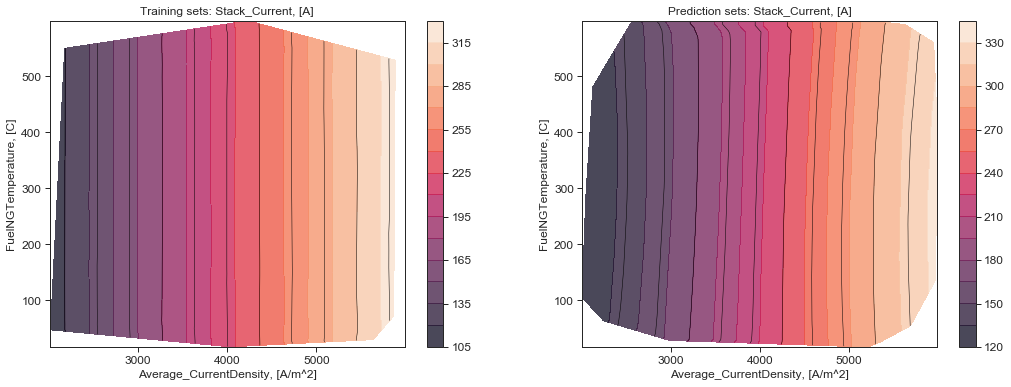

In [51]:
x_variable_name = 'Average_CurrentDensity'
y_variable_name = 'FuelNGTemperature'
z_variable_name = 'Stack_Current'
pltoption = 0
saveoption = False
d.plot_contour_2D(x_variable_name, y_variable_name, z_variable_name, pltoption, saveoption)

* Run the cell below to **Plot 3-D Contour**
    * <font color = 'blue'>x_variable_name</font>: the independent variable name on the X-axis
    * <font color = 'blue'>y_variable_name</font>: the independent variable name on the Y-axis
    * <font color = 'blue'>z_variable_name</font>: the dependent variable name on the Z-axis
    * <font color = 'blue'>pltoption</font>: select from <font color = 'green'>0</font>, <font color = 'green'>1</font> and <font color = 'green'>2</font>
        * <font color = 'green'>0</font>: plot both training input and prediction output
        * <font color = 'green'>1</font>: only plot training data
        * <font color = 'green'>2</font>: only plot prediction data
    * <font color = 'blue'>saveoption</font>: = <font color = 'green'>True</font> means saving the figure to the working directory

############################################################              
Predict Based on the trained model              
############################################################
Step 1: Load the training data S, Y and prediction input data X
Step 2: Load the trained model (outtrainingFile)
	Finish Prediction - Xy
Step 4: Write the predictions
End of code



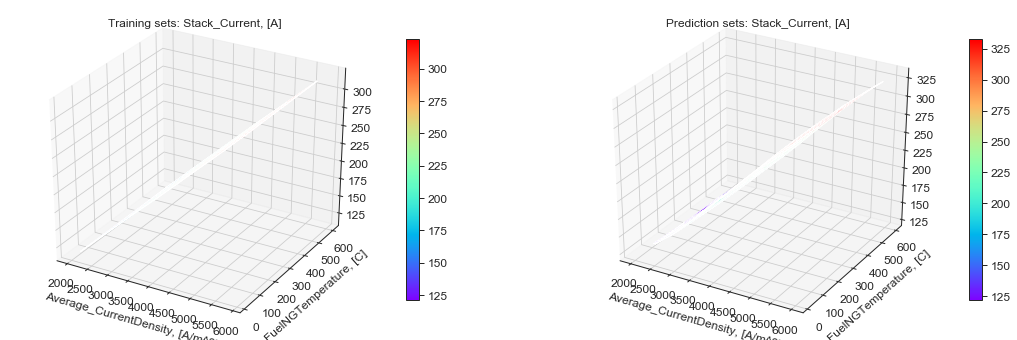

In [52]:
x_variable_name = 'Average_CurrentDensity'
y_variable_name = 'FuelNGTemperature'
z_variable_name = 'Stack_Current'
pltoption = 0
saveoption = False
d.plot_contour_3D(x_variable_name, y_variable_name, z_variable_name, pltoption, saveoption)

* Run the cell below to **Plot box plot**
    * it is to study the sensitivity between input and output variables
    * <font color = 'blue'>x_variable_name</font>: the independent variable name on the X-axis
    * <font color = 'blue'>y_variable_name</font>: the dependent variable name on the Y-axis
    * <font color = 'blue'>saveoption</font>: = <font color = 'green'>True</font> means saving the figure to the working directory

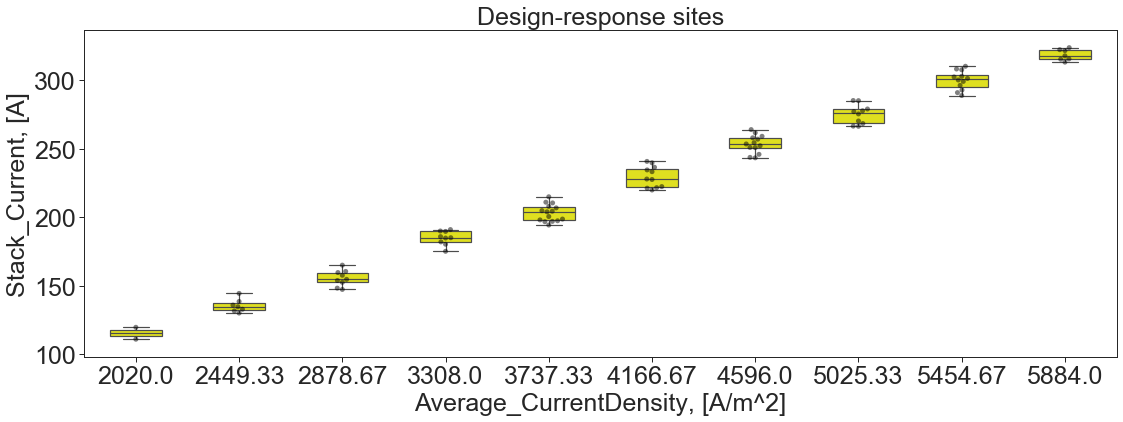

In [53]:
x_variable_name = 'Average_CurrentDensity'
y_variable_name = 'Stack_Current'
saveoption = False
d.plot_box(x_variable_name, y_variable_name, saveoption)

## <font color = 'blue'>Step 4c. with Physics-informed DNN method</font>
**This step shares similar functions as "Step 4a", but trains the ROMs with the Physics-informed DNN regression model**

* Run the cell below to **Create a ROM Job**
    * Assign the working directory for kriging
        * <font color = 'blue'>work_path</font>: by default, it is the same as <font color = 'blue'>work_path</font> in **Step 2**
    * <font color = 'blue'>allresults</font>: File name of summarized simulation results
    * <font color = 'blue'>allresults_info</font>: File name of supplemental file for the simulation results
    * <font color = 'blue'>intraining</font>: File name of training input file
    * <font color = 'blue'>info</font>: File name of supplemental file for the training input
    * <font color = 'blue'>outtraining</font>: File  name of training output file
    * <font color = 'blue'>inprediction</font>: File  name of prediction input file
    * <font color = 'blue'>outprediction</font>: File  name of prediction output file

In [55]:
work_path = './Test_WW'
allresults = 'allResults_Phy.dat'
allresults_info = 'allResults_Phy_info.dat'
intraining = 'inTraining_Phy.dat'
info = 'info_Phy.dat'
outtraining = 'outTraining_Phy.dat' 
inprediction = 'inPrediction_Phy.dat'
outprediction = 'outPrediction_Phy.dat'
p = pys.PhyDNN(work_path, allresults, allresults_info, 
            intraining, info, outtraining, 
            inprediction, outprediction)

* Run the cell below to **Summarize the Simulation Results**
    * Assign the source directory where the simulation results are
        * <font color = 'blue'>source_path</font>: by default, it is the same as <font color = 'blue'>work_path</font> in **Step 2**
    * <font color = 'blue'>indcase</font>: the cases which will be summarized for training input file
        * by default, all the cases (<font color = 'green'>[1, 2, 3, ... , <font color = 'blue'>numcase</font>]</font>) are included
        * honestly, the user can select any certain cases (e.g.: <font color = 'green'>[1, 2, 3, 4, 5]</font> for the first five cases)
    * <font color = 'blue'>exclude_case</font>: select from <font color = 'green'>-1</font>, <font color = 'green'>0</font> and <font color = 'green'>1</font>
        * <font color = 'green'>-1</font>: include all the cases with results
        * <font color = 'green'>0</font>: exclude failed cases
        * <font color = 'green'>1</font>: exclude failed and non-converged cases
    * <font color = 'blue'>display_detail</font>: = <font color = 'green'>True</font> means displaying the contents of the training input file
    * It will generate <font color = 'green'>allResults.dat</font> and <font color = 'green'>allResults_info.dat</font>

In [56]:
source_path = work_path
indcase = list(range(1, numcase+1)) # [1, 2, 3, ... , numcase]
exclude_case = -1
display_detail = False
p.summarize_SimuResult(source_path, indcase, exclude_case, display_detail)

############################################################              
Summarize simulation results              
############################################################
Simulation results are summarized from 151 cases:
1 6 9 10 15 18 19 21 22 23 25 26 29 34 35 36 37 38 41 42 43 46 49 56 57 62 66 69 70 73 74 75 79 82 85 86 91 93 95 96 97 103 104 107 111 113 114 115 116 119 120 122 124 126 127 131 133 135 136 151 154 156 157 164 174 177 178 179 180 182 183 192 193 200 204 206 208 212 214 216 220 222 229 233 242 249 254 256 257 261 263 264 269 278 281 285 287 289 314 317 318 319 322 326 331 333 339 340 343 345 348 349 351 354 358 364 372 376 377 383 385 389 397 415 416 418 423 425 426 427 428 434 435 437 438 440 441 442 443 447 450 454 456 465 469 470 485 488 490 493 500

Select from the following input variables for training:
1 : Average_CurrentDensity	
2 : FuelNGTemperature	
3 : Internal_Reforming	
4 : OxidantTemperature	
5 : Oxidant_Recirculation	
6 : OxygenToCarbon_Ratio	
7 

* Run the cell below to **Build the ROM using DNN regression**
    * <font color = 'blue'>frac4ROM</font>: the fraction of the summarized simulation results to build the ROM, the rest is used for cross-validation
        * By default  = <font color = 'green'>80</font> means 80% of the data are used to build the ROM, 20% are used for cross-validation
    * <font color = 'blue'>preprocessor_name</font>: select one from:
        * <font color = 'green'>'NGFC_ccs'</font> = NGFC with carbon capture
        * <font color = 'green'>'NGFC_nocc'</font> = NGFC without carbon capture 
        * <font color = 'green'>'IGFC_ccs'</font> = IGFC (with aor without carbon capture) 
        * <font color = 'green'>'NGFC_ccs_vgr'</font> = NGFC with vented gas recirculation (VGR)
        * <font color = 'green'>'IGFC_ccs_vgr'</font> = IGFC with vented gas recirculation (VGR)
    * If <font color = 'blue'>preprocessor_name</font> = <font color = 'green'>'IGFC_ccs'</font> or <font color = 'green'>'IGFC_ccs_vgr'</font>: 
        * <font color = 'blue'>igfc</font>: select one gasifier from: <font color = 'green'>'conventional'</font>, <font color = 'green'>'enhanced'</font>, <font color = 'green'>'catalytic'</font> 
    * <font color = 'blue'>filter_enabled</font>: The user can choose to enable a z-score filter to remove out-of-bound noise and smooth the raw training data
        * A z-score (also called a standard score) is a measure of how many standard deviations below or above the population mean a raw data point is, the data points with z-scores larger than <font color = 'blue'>z_thres</font> will be filtered
    * It will generate the trained model (<font color = 'green'>outTraining.dat.dat</font>) and perform the cross-validation for all the output variables

In [57]:
frac4ROM = 80
preprocessor_name = 'NGFC_ccs'
igfc = None
filter_enabled = True # enable the z-score filter or not
z_thres = 5 # threshold of the z-score filter
p.buildROM(frac4ROM, preprocessor_name, igfc, filter_enabled, z_thres)

############################################################              
Build the ROM              
############################################################
DNN ROM training start ...
training data set size   33  *  9
validation data set size 9  *  9
prediction for class training data set size 60  *  9
prediction for final testing data set size  30  *  9
Number of layers =  4
4
epoch  1   training cost = 0.99409   validation cost = 1.48059   training time (s/100epochs)=  0.12367
epoch  101   training cost = 0.31619   validation cost = 1.14685   training time (s/100epochs)=  0.44082
epoch  201   training cost = 0.14419   validation cost = 0.81397   training time (s/100epochs)=  0.60438
epoch  301   training cost = 0.06100   validation cost = 0.58829   training time (s/100epochs)=  0.44580
epoch  401   training cost = 0.01799   validation cost = 0.54362   training time (s/100epochs)=  0.45877
epoch  501   training cost = 0.00689   validation cost = 0.56365   training time (s/100ep

C:\Users\wang109\Documents\GitHub\Python_ROM_GUI\pySOFC_new.py:14224: RuntimeWarning: invalid value encountered in true_divide
C:\Users\wang109\Documents\GitHub\Python_ROM_GUI\pySOFC_new.py:14265: RuntimeWarning: invalid value encountered in true_divide


0  cls_testing
DNN classification training start ...
training data set size   48  *  56
validation data set size 12  *  56
prediction for final testing data set size  30  *  56
Epoch: 1 cost = nan   Validation accuracy: 0.16666667   Test accuracy: 0.13333334
Epoch: 101 cost = nan   Validation accuracy: 0.16666667   Test accuracy: 0.13333334
Classifier accuracy with vali-data:  0.16666667
Classifier accuracy with test-data:  0.13333334
length of cls_values:  4
length of cls_ROM_values:  10
Noise filter: trim 6 rows from a total of 119 rows
DNN ROM training start ...
training data set size   72  *  9
validation data set size 18  *  9
prediction for testing data set size 23  *  9
Number of layers =  4
4
epoch  1   training cost = 1.04722   validation cost = 0.80468   training time (s/100epochs)=  0.10871
epoch  101   training cost = 0.37336   validation cost = 0.47623   training time (s/100epochs)=  0.46775
epoch  201   training cost = 0.27948   validation cost = 0.44470   training time (

0.13333334

* Run the cell below to **Estimate the Confidence Intervals of all the Output Variables**
    * <font color = 'blue'>percentage</font>: the confidence percentage
    * <font color = 'blue'>int_all</font>: the confidence interval (display as follows)

In [58]:
percentage = 95
int_all = p.percent2intervl(percentage)

############################################################              
Percentage to Confidence Interval              
############################################################
For "Outlet_Fuel_Flowrate":[mol/s] 
	95% confidence interval is ± 2.3956E-05	
For "Outlet_Fuel_H2":[-] 
	95% confidence interval is ± 1.0264E-02	
For "Outlet_Fuel_H2O":[-] 
	95% confidence interval is ± 1.0087E-02	
For "Outlet_Fuel_CO":[-] 
	95% confidence interval is ± 1.0216E-02	
For "Outlet_Fuel_CO2":[-] 
	95% confidence interval is ± 1.0094E-02	
For "Outlet_Fuel_CH4":[-] 
	95% confidence interval is ± 2.5513E-03	
For "Outlet_Fuel_N2":[mol/s] 
	95% confidence interval is ± 2.2772E-05	
For "Outlet_Air_Flowrate":[-] 
	95% confidence interval is ± 1.0006E-06	
For "Outlet_Air_O2":[-] 
	95% confidence interval is ± 6.8593E-05	
For "Outlet_Air_N2":[-] 
	95% confidence interval is ± 1.0329E-04	
For "Outlet_Air_H2O":[-] 
	95% confidence interval is ± 1.8403E-06	
For "Outlet_Air_CO2":[-] 
	95% confidence interv

* Run the cell below to **Estimate the Confidence Intervals of a Certain Output Variable**
    * <font color = 'blue'>percentage</font>: the confidence percentage
    * <font color = 'blue'>variable_name</font>: the output variable name can be found from above cells
    * <font color = 'blue'>interval</font>: the confidence interval (display as follows)

In [59]:
percentage = 95
variable_name = 'Outlet_Fuel_Flowrate'
interval = p.percent2intervl(percentage, variable_name)

############################################################              
Percentage to Confidence Interval              
############################################################
For "Outlet_Fuel_Flowrate":[mol/s] 
	95% confidence interval is ± 2.3956E-05	
End of code



* Run the cell below to **Estimate the Confidence Percentage of a Certain Output Variable**
    * <font color = 'blue'>interval</font>: the confidence interval
    * <font color = 'blue'>variable_name</font>: the output variable name can be found from above cells
    * <font color = 'blue'>percentage</font>: the confidence percentage (display as follows)

In [60]:
interval = 0.00002
variable_name = 'Outlet_Fuel_Flowrate'
percentage = p.intervl2percent(interval, variable_name)

############################################################              
Confidence Interval to Percentage              
############################################################
For "Outlet_Fuel_Flowrate": [mol/s]
	±2e-05 interval has a confidence of 88.59%
End of code



* Run the cell below to **Generate the Prediction Input File** (<font color = 'green'>inPrediction.dat</font>)
    * The length of <font color = 'blue'>listmin</font> and <font color = 'blue'>listmax</font> must be the same as the input variables in the training input file (<font color = 'green'>inTraining.dat</font>)
    * Usually, the user mannually prepares a prediction input file

In [61]:
numsample = 200
listmin = [2000, 15, 0, 550, 0, 1.5, 0.4, 0.0833, 1]
listmax = [6000, 600, 1, 800, 0.8, 3, 0.95, 0.833, 5]
p.Generate_inprediction(numsample, listmin, listmax)

############################################################                
Generate prediction input                
############################################################
Created prediciton input file
End of code



* Run the cell below to **Perform Prediction based on the Trained Model** 
    * It will generate the prediction output file (<font color = 'green'>outPrediction.dat</font>)

In [62]:
p.prediction(preprocessor_name = None, igfc = None)

############################################################              
Predict Based on the trained model              
############################################################
Step 1: Load the training data S, Y and prediction input data X
Step 6: Load the trained model (outtrainingFile)
Step 10: Write the predictions
End of code



* Run the cell below to **Plot 2-D Contour**
    * <font color = 'blue'>x_variable_name</font>: the independent variable name on the X-axis
    * <font color = 'blue'>y_variable_name</font>: the independent variable name on the Y-axis
    * <font color = 'blue'>z_variable_name</font>: the dependent variable name on the Z-axis
    * <font color = 'blue'>pltoption</font>: select from <font color = 'green'>0</font>, <font color = 'green'>1</font> and <font color = 'green'>2</font>
        * <font color = 'green'>0</font>: plot both training input and prediction output
        * <font color = 'green'>1</font>: only plot training data
        * <font color = 'green'>2</font>: only plot prediction data
    * <font color = 'blue'>saveoption</font>: = <font color = 'green'>True</font> means saving the figure to the working directory

############################################################              
Predict Based on the trained model              
############################################################
Step 1: Load the training data S, Y and prediction input data X


C:\Users\wang109\Documents\GitHub\Python_ROM_GUI\pySOFC_new.py:15292: RuntimeWarning: invalid value encountered in true_divide


Step 6: Load the trained model (outtrainingFile)
Step 10: Write the predictions
End of code



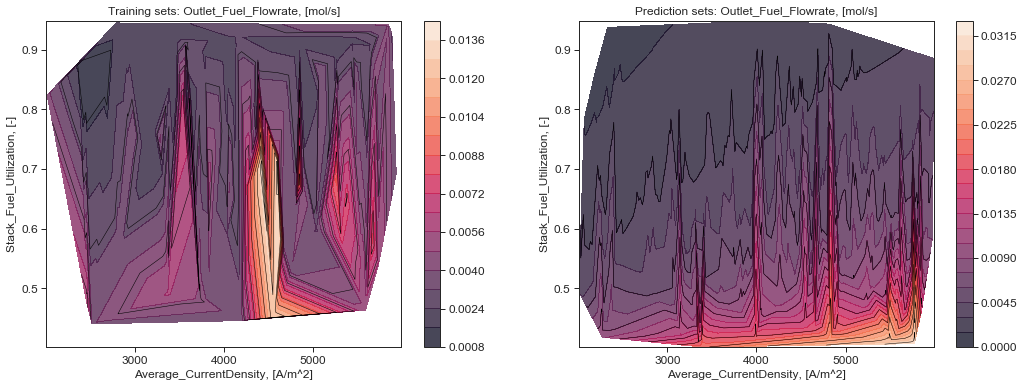

In [63]:
x_variable_name = 'Average_CurrentDensity'
y_variable_name = 'Stack_Fuel_Utilization'
z_variable_name = 'Outlet_Fuel_Flowrate'
pltoption = 0
saveoption = False
p.plot_contour_2D(x_variable_name, y_variable_name, z_variable_name, pltoption, saveoption)

* Run the cell below to **Plot 3-D Contour**
    * <font color = 'blue'>x_variable_name</font>: the independent variable name on the X-axis
    * <font color = 'blue'>y_variable_name</font>: the independent variable name on the Y-axis
    * <font color = 'blue'>z_variable_name</font>: the dependent variable name on the Z-axis
    * <font color = 'blue'>pltoption</font>: select from <font color = 'green'>0</font>, <font color = 'green'>1</font> and <font color = 'green'>2</font>
        * <font color = 'green'>0</font>: plot both training input and prediction output
        * <font color = 'green'>1</font>: only plot training data
        * <font color = 'green'>2</font>: only plot prediction data
    * <font color = 'blue'>saveoption</font>: = <font color = 'green'>True</font> means saving the figure to the working directory

############################################################              
Predict Based on the trained model              
############################################################
Step 1: Load the training data S, Y and prediction input data X
Step 6: Load the trained model (outtrainingFile)
Step 10: Write the predictions
End of code



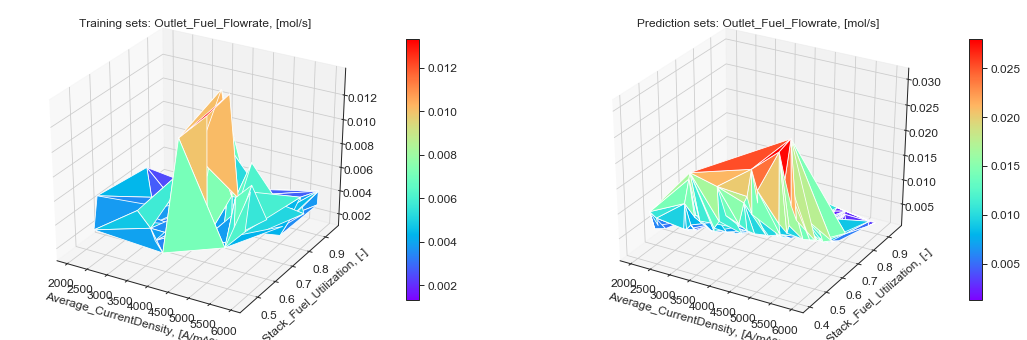

In [64]:
x_variable_name = 'Average_CurrentDensity'
y_variable_name = 'Stack_Fuel_Utilization'
z_variable_name = 'Outlet_Fuel_Flowrate'
pltoption = 0
saveoption = False
p.plot_contour_3D(x_variable_name, y_variable_name, z_variable_name, pltoption, saveoption)

* Run the cell below to **Plot box plot**
    * it is to study the sensitivity between input and output variables
    * <font color = 'blue'>x_variable_name</font>: the independent variable name on the X-axis
    * <font color = 'blue'>y_variable_name</font>: the dependent variable name on the Y-axis
    * <font color = 'blue'>saveoption</font>: = <font color = 'green'>True</font> means saving the figure to the working directory

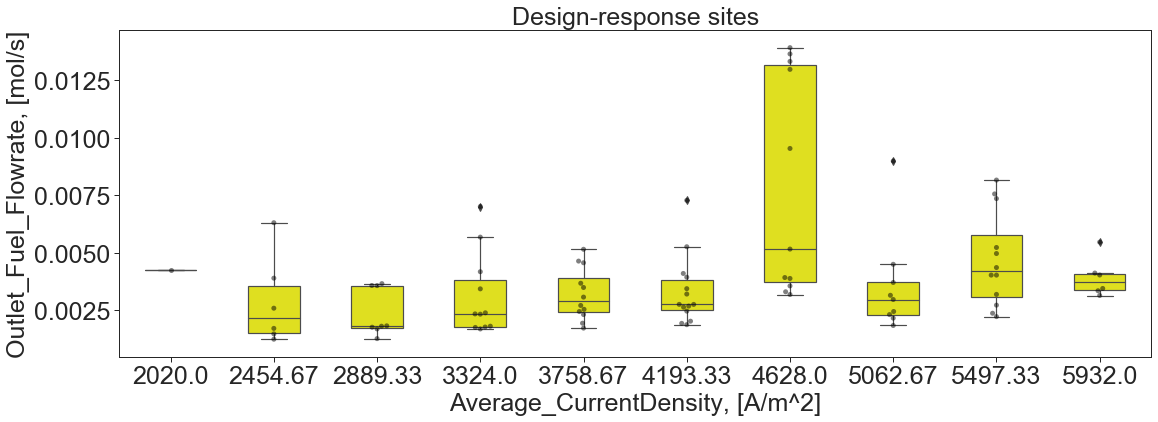

In [65]:
x_variable_name = 'Average_CurrentDensity'
y_variable_name = 'Outlet_Fuel_Flowrate'
saveoption = False
p.plot_box(x_variable_name, y_variable_name, saveoption)